<a href="https://colab.research.google.com/github/imnotamr/NTI-Projects/blob/main/NTI_Course_30_1_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving UdemyCoursesDataset.csv to UdemyCoursesDataset.csv


In [4]:
data = pd.read_csv('UdemyCoursesDataset.csv')
data.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [6]:
data.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.682000e+03,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,3194.230310,156.093156,40.065182
std,3.436355e+05,9499.378361,934.957204,50.373299
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.078430e+05,110.250000,4.000000,15.000000
50%,6.885580e+05,911.500000,18.000000,25.000000
75%,9.617515e+05,2540.250000,67.000000,45.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


In [7]:
data.isnull().sum()

,0
course_id,0
course_title,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0
content_duration,0
published_timestamp,0


In [8]:
data.duplicated().sum()

6

In [9]:
data.nunique()

,0
course_id,3676
course_title,3667
is_paid,2
price,38
num_subscribers,2198
num_reviews,511
num_lectures,229
level,4
content_duration,109
published_timestamp,3676


In [13]:
# replace free in (price) column  with 0
data['price'] = data['price'].replace('Free', 0).astype(float)

In [14]:
# convert (published_timestamp) to datetime format
data['published_timestamp'] = pd.to_datetime(data['published_timestamp'])

In [18]:
# check if numeric columns are in format
numeric_columns = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [45]:
# detect and remove outliers using IQR method
col = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
for col in col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

<Figure size 1000x600 with 0 Axes>

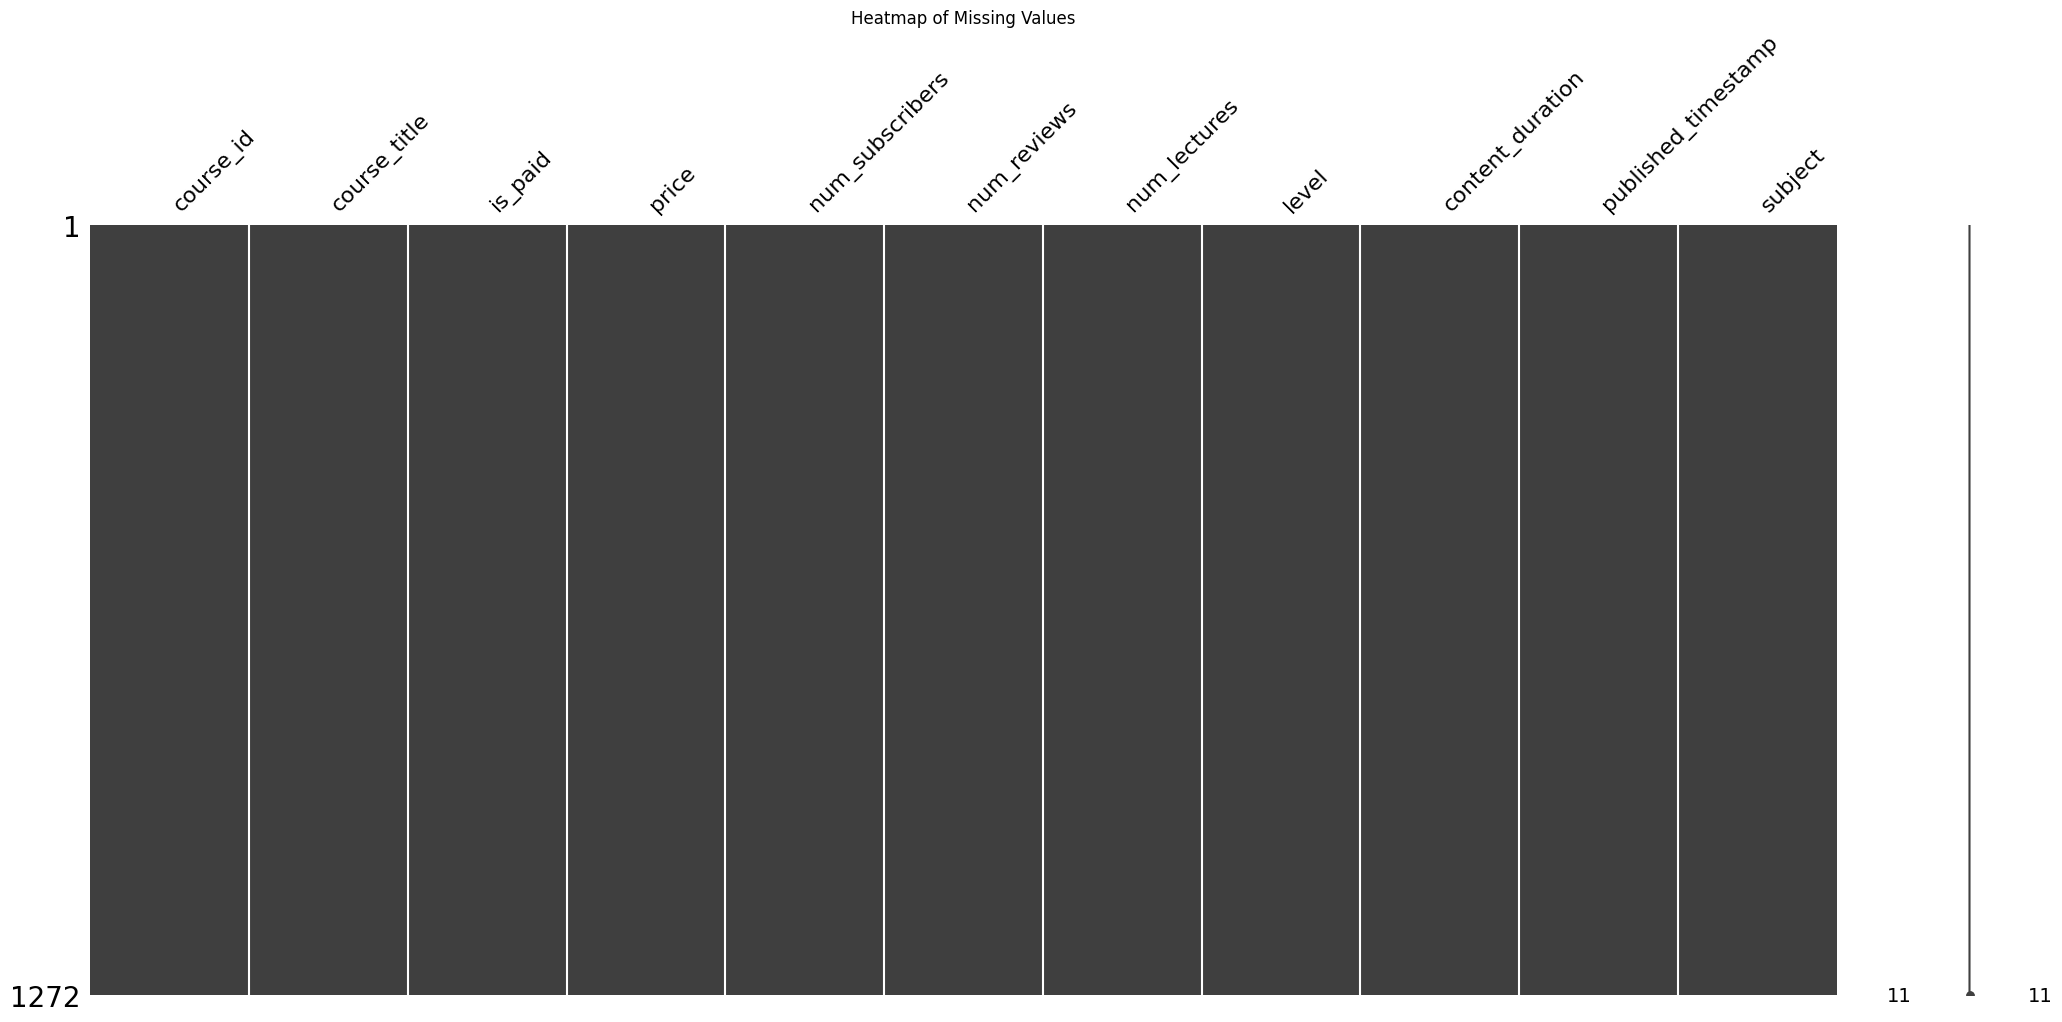

In [31]:
import missingno as msno

plt.figure(figsize=(10, 6))
msno.matrix(data, sparkline=True)
plt.title("Heatmap of Missing Values")
plt.show()

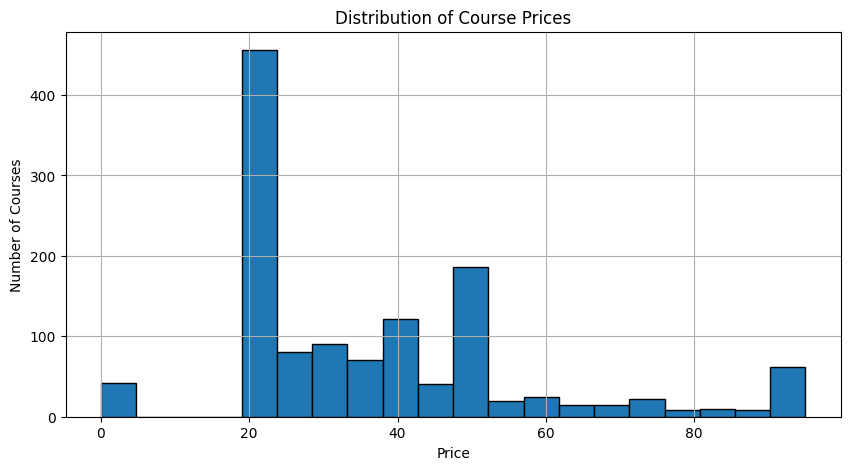

In [21]:
# Distribution of Course Prices
plt.figure(figsize=(10, 5))
data['price'].hist(bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Number of Courses')
plt.title('Distribution of Course Prices')
plt.show()

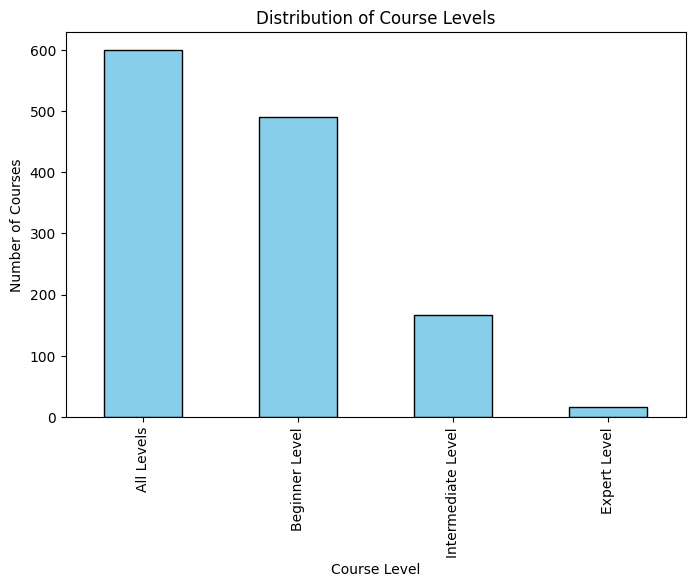

In [22]:
# Most Popular Course Levels
plt.figure(figsize=(8, 5))
data['level'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Course Level')
plt.ylabel('Number of Courses')
plt.title('Distribution of Course Levels')
plt.show()

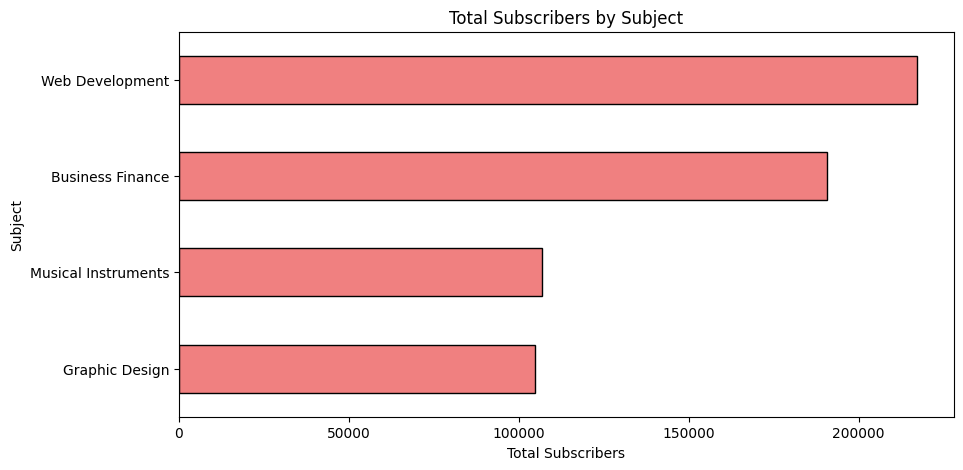

In [23]:
# Number of Subscribers by Subject
plt.figure(figsize=(10, 5))
data.groupby('subject')['num_subscribers'].sum().sort_values().plot(kind='barh', color='lightcoral', edgecolor='black')
plt.xlabel('Total Subscribers')
plt.ylabel('Subject')
plt.title('Total Subscribers by Subject')
plt.show()

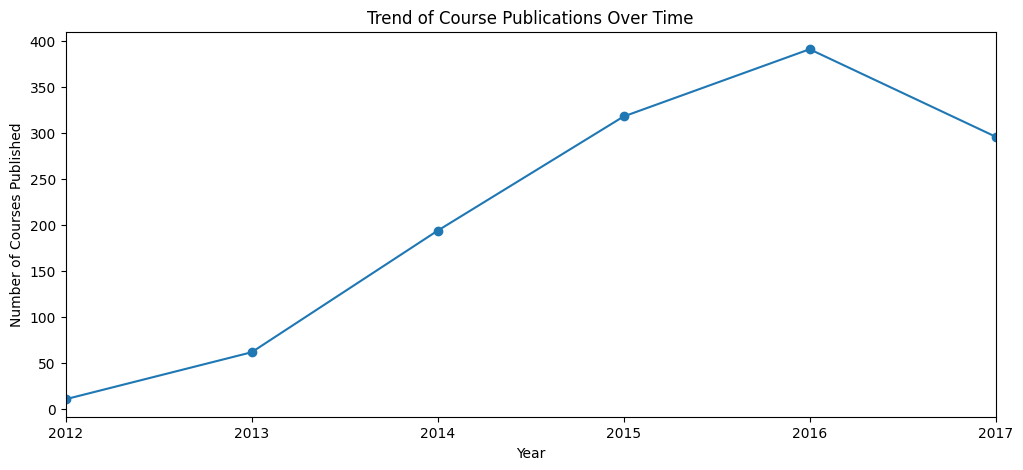

In [24]:
# Trend of Course Publications Over Time
plt.figure(figsize=(12, 5))
data.set_index('published_timestamp').resample('Y').count()['course_id'].plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Courses Published')
plt.title('Trend of Course Publications Over Time')
plt.show()

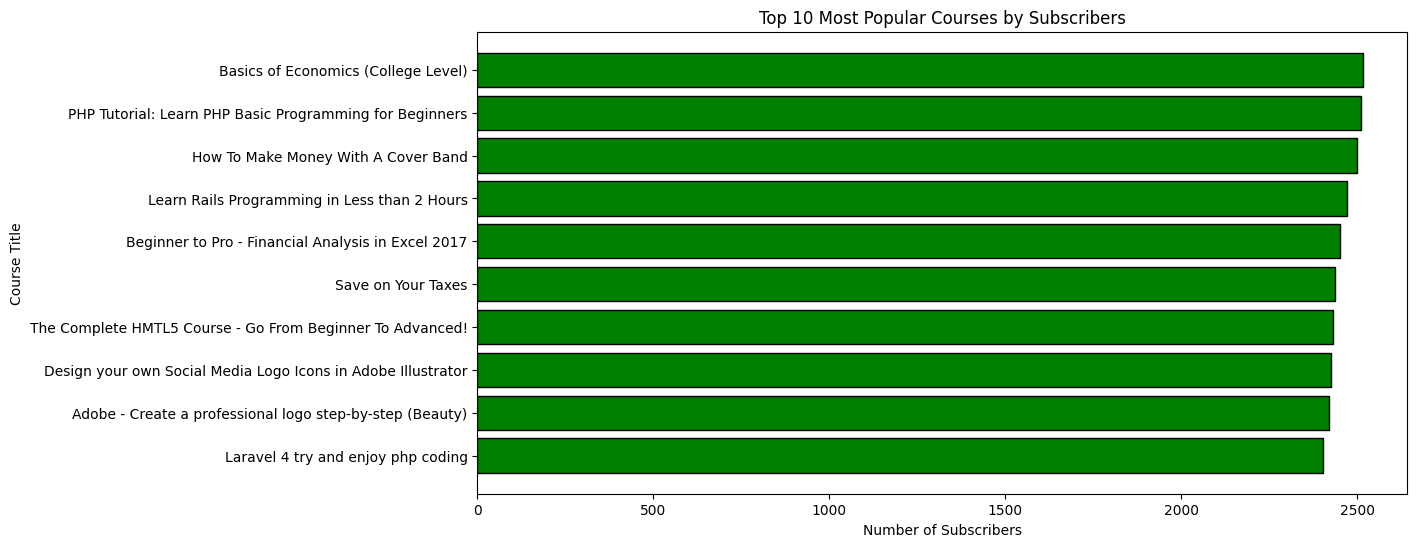

In [30]:
# Top 10 Most Popular Courses by Subscribers
top_courses = data[['course_title', 'num_subscribers']].sort_values(by='num_subscribers', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_courses['course_title'], top_courses['num_subscribers'], color='green', edgecolor='black')
plt.xlabel('Number of Subscribers')
plt.ylabel('Course Title')
plt.title('Top 10 Most Popular Courses by Subscribers')
plt.gca().invert_yaxis()
plt.show()

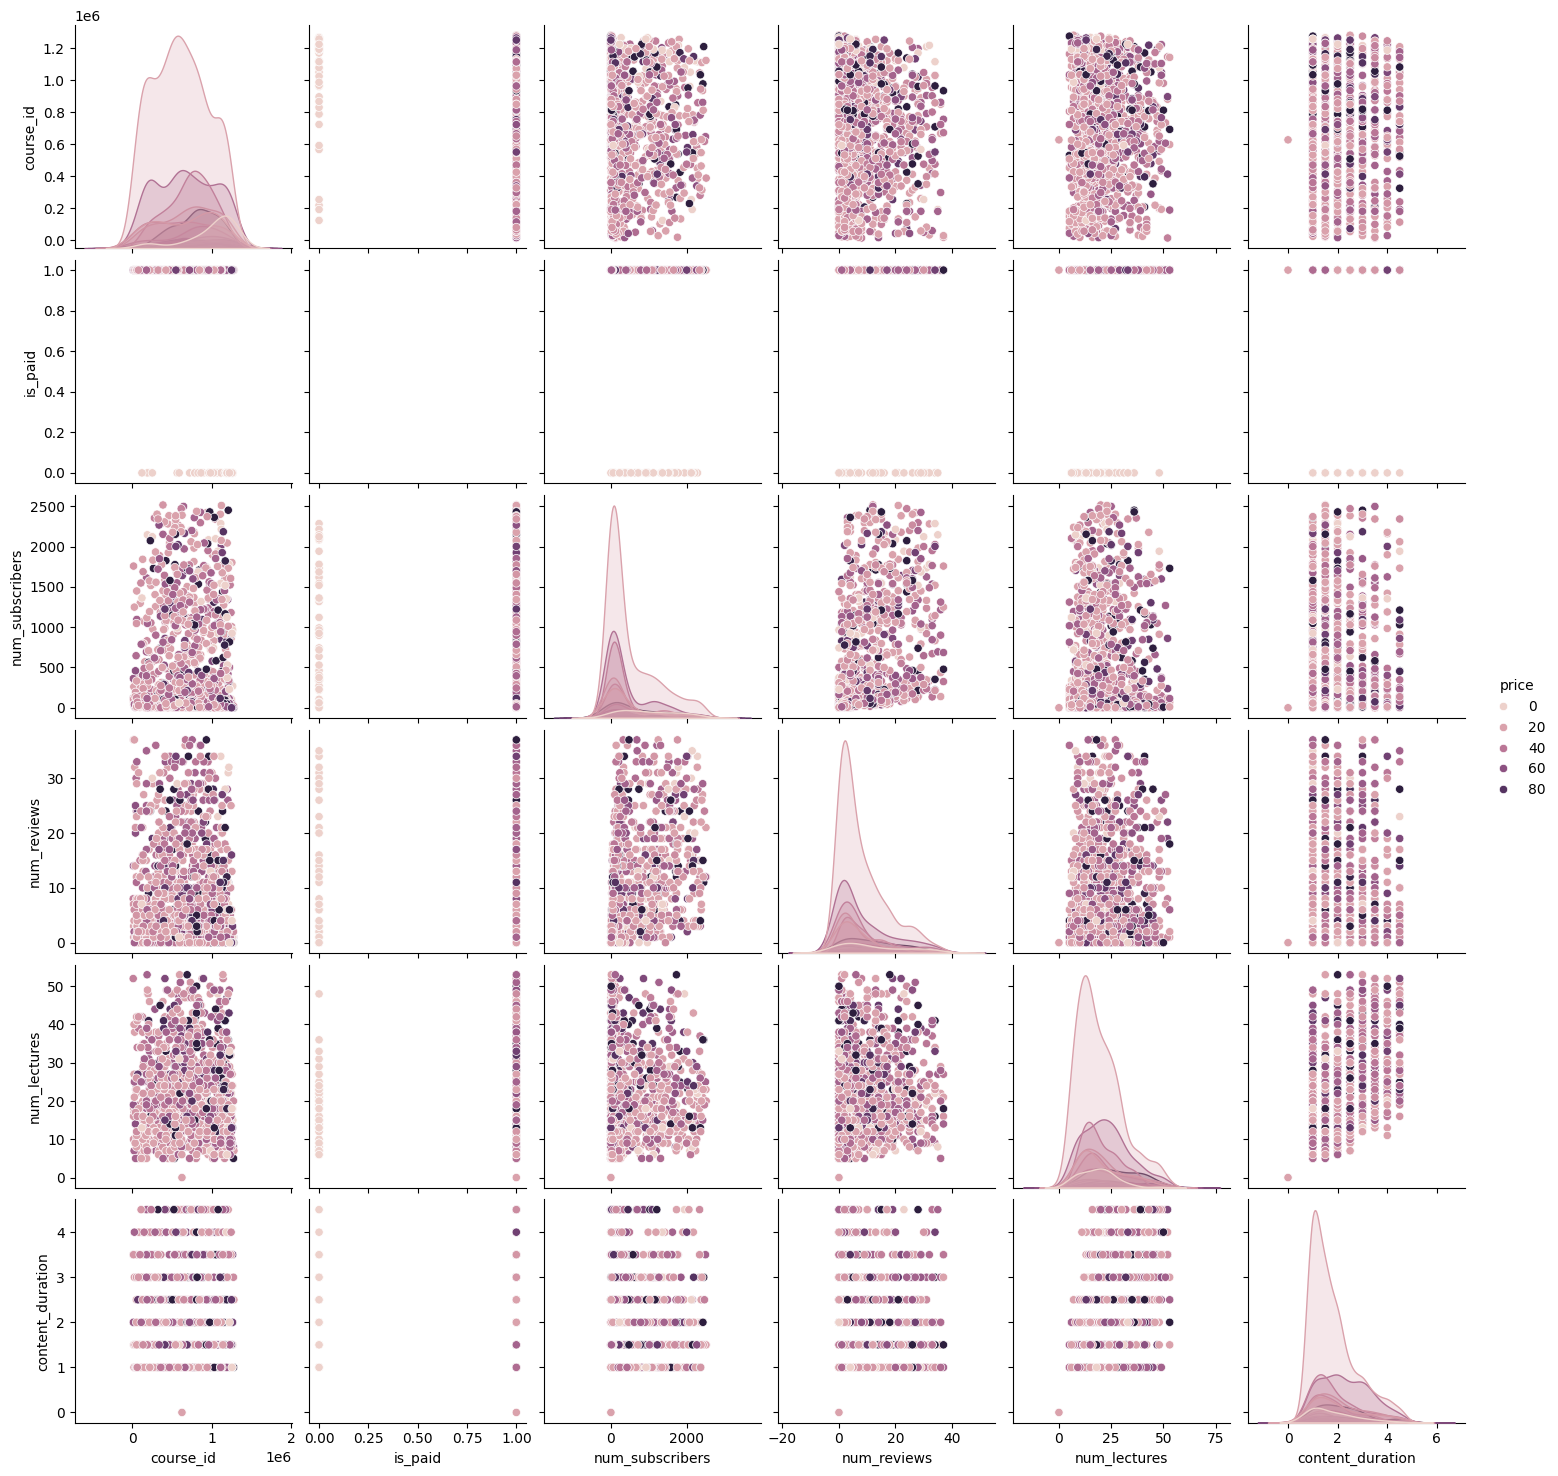

In [32]:
sns.pairplot(data,hue="price")

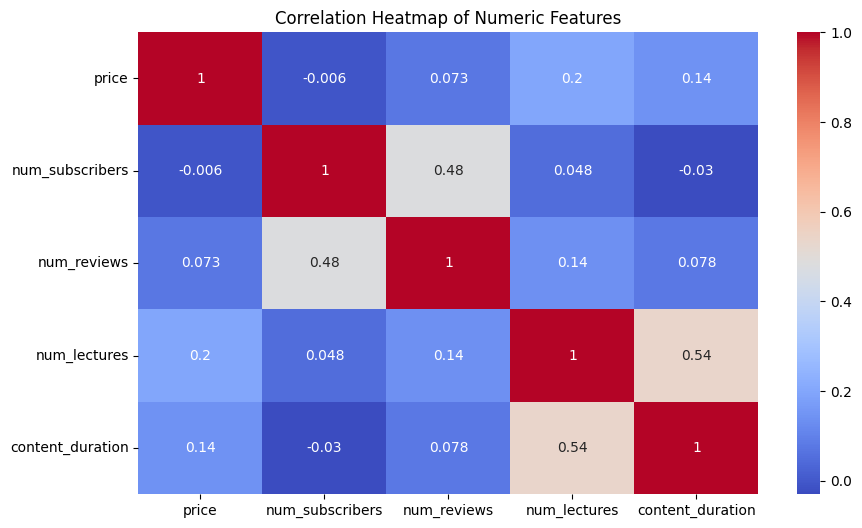

In [36]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

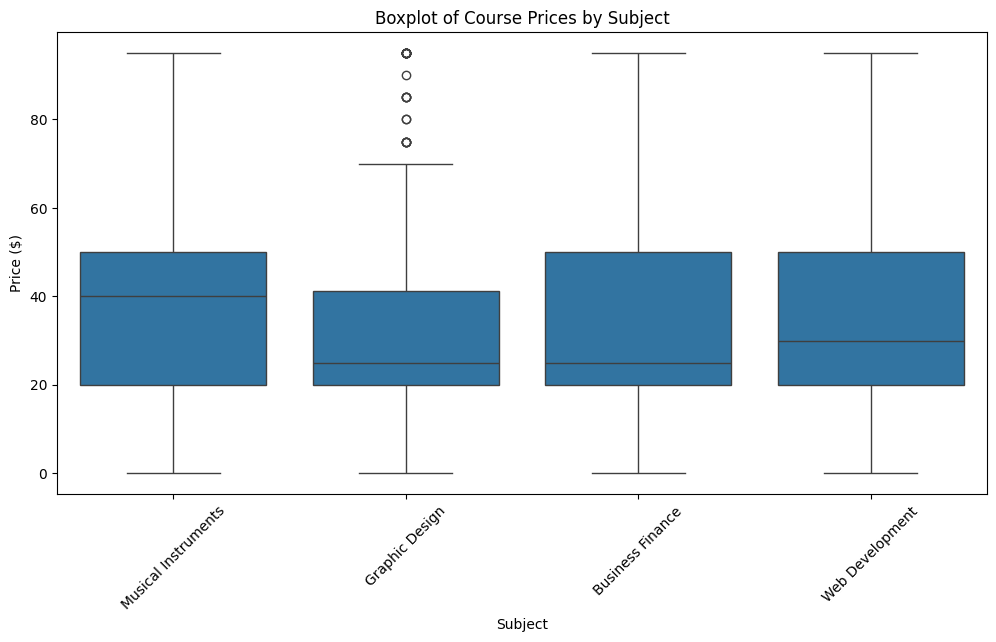

In [37]:
# Boxplot of Price by Subject
plt.figure(figsize=(12, 6))
sns.boxplot(x='subject', y='price', data=data)
plt.xlabel('Subject')
plt.ylabel('Price ($)')
plt.title('Boxplot of Course Prices by Subject')
plt.xticks(rotation=45)
plt.show()

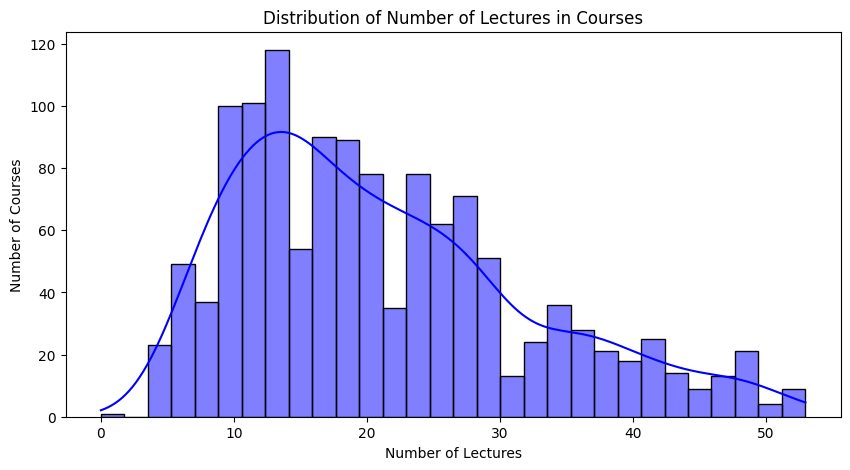

In [40]:
# Distribution of Number of Lectures
plt.figure(figsize=(10, 5))
sns.histplot(data['num_lectures'], bins=30, kde=True, color='blue')
plt.xlabel('Number of Lectures')
plt.ylabel('Number of Courses')
plt.title('Distribution of Number of Lectures in Courses')
plt.show()

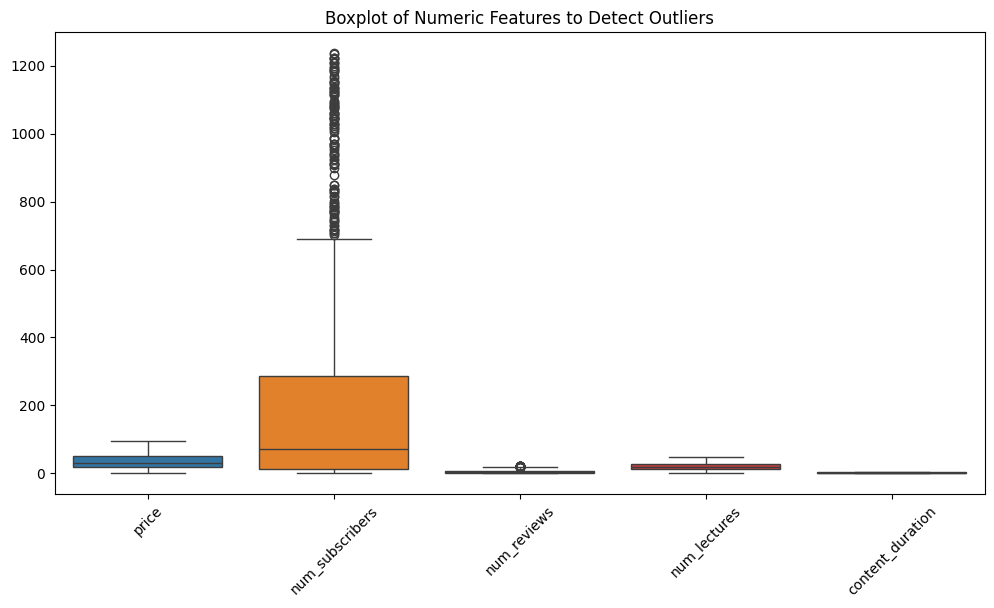

In [50]:
# Boxplot to show outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Features to Detect Outliers')
plt.show()

In [54]:
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, widgets

In [67]:
# Line Chart for Course Publications Over Time
fig = px.line(data.resample('Y', on='published_timestamp').count().reset_index(), x='published_timestamp', y='course_id', title='Courses Published Over Time')
fig.show()

# Pie Chart for Course Levels
fig = px.pie(data, names='level', title='Distribution of Course Levels')
fig.show()

# Treemap for Subjects
fig = px.treemap(data, path=['subject'], values='num_subscribers', title='Treemap of Subjects by Subscribers')
fig.show()

# Bar Chart for Top 10 Most Popular Courses
popular_courses = data.nlargest(10, 'num_subscribers')
fig = px.bar(popular_courses, x='course_title', y='num_subscribers', title='Top 10 Most Popular Courses', text_auto=True)
fig.show()

# Sunburst Chart for Categories and Levels
fig = px.sunburst(data, path=['subject', 'level'], values='num_subscribers', title='Sunburst Chart: Subjects and Levels')
fig.show()

# Dumbbell Chart for Course Popularity
fig = px.scatter(data, x='num_reviews', y='num_subscribers', size='price', title='Dumbbell Chart for Course Popularity')
fig.show()

In [64]:
# Special Animated Bar Chart Over Time
fig = px.bar(data, x='subject', y='num_subscribers', animation_frame='published_timestamp', title='Animated Bar Chart of Subscribers Over Time')
fig.show()